In [17]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from openpyxl import Workbook
import pandas as pd
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [18]:
driver = webdriver.Chrome("chromedriver.exe") #크롬 드라이브를 실행함
driver.maximize_window() # 크롬화면을 최대로 키운다
a=input("유튜브명 : ") 
url = "https://www.youtube.com/results?search_query={}".format(a) 
driver.get(url) # 해당 홈페이지로 접속
driver.implicitly_wait(3) #페이지 로드 대기시간 설정

유튜브명 : 뷰티풀너드


In [19]:
time.sleep(1.5) # 대기 시간 중간중간에 넣어주기
driver.refresh()
element = driver.find_element(By.ID, "text") # 드라이버에 특정 요소를 찾아라
element.click() # 해당 요소를 클릭하라
element = driver.find_element(By.LINK_TEXT, "동영상") # 드라이버에 특정 요소를 찾아라
element.click() # 해당 요소를 클릭하라
time.sleep(3) # 대기 시간 중간중간에 넣어주기

In [20]:
last_height = driver.execute_script("return document.documentElement.scrollHeight")
num_scrolls = 1 # 스크롤을 내리는 횟수 지정하기
url_list = [] # 크롤링 되는 url을 담을 list 만들기

In [21]:
for i in range(num_scrolls): #앞에서 지정한 num_scrolls 값에 따라 for문 시작
    #처음부터 끝까지 스크롤을 내려 해당내용 크롤링
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight)")
    time.sleep(1.5)
    # 스크롤을 내렸을 때 더 이상 내용이 없을 때
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height: # 더 이상 내용이 없으므로 종료해라
        break
    html_source = driver.page_source #페이지 소스를 받아와라
    soup = BeautifulSoup(html_source, "html.parser") # 페이지 소스에서 html.parser에 들어가라
# 동영상의 url이 포함된 요소를 찾기
parent_elements = soup.find_all(class_ = 'yt-simple-endpoint style-scope ytd-playlist-thumbnail')
# 동영상의 요소의 href값을 추출해 저장하기
for parent_element in parent_elements:
    url = parent_element['href']
    url_list.append('https://www.youtube.com' + url)

In [22]:
# 저장된 url 리스트를 프린트 하시오
url_list=list(set(url_list))
print(url_list)
#유료 가입 광고 무시하기
try:
    driver.find_element_by_css_selector("#dismiss-button > a").click()
except:
    pass

['https://www.youtube.com/watch?v=Zk26R4eOZ64', 'https://www.youtube.com/watch?v=C9qi9-GFDoQ', 'https://www.youtube.com/watch?v=iTBU7xVe06Y', 'https://www.youtube.com/watch?v=XN0QucNtxZ0', 'https://www.youtube.com/watch?v=sO9XTFhyAWE', 'https://www.youtube.com/watch?v=-0QN5X57oVo', 'https://www.youtube.com/watch?v=dvn_gOga_B4', 'https://www.youtube.com/watch?v=LA-CnFLbtBs', 'https://www.youtube.com/watch?v=JIxAThyHCgE', 'https://www.youtube.com/watch?v=9vTaSA5kRXA', 'https://www.youtube.com/watch?v=7K50juIr5Ek', 'https://www.youtube.com/watch?v=HeOVbg2y_ug', 'https://www.youtube.com/watch?v=qHOcj4CTTd4', 'https://www.youtube.com/watch?v=3qjX6YWqLIo', 'https://www.youtube.com/watch?v=w2wuIrhXn8Y', 'https://www.youtube.com/watch?v=7PxJFufNwig', 'https://www.youtube.com/watch?v=3NhiehXJASs', 'https://www.youtube.com/watch?v=1iBxocxqhD4', 'https://www.youtube.com/watch?v=wfC1hjpKZC0', 'https://www.youtube.com/watch?v=W1LZu9AnDoc', 'https://www.youtube.com/watch?v=Kdh3NrB3gFo', 'https://www

In [35]:
driver = webdriver.Chrome("chromedriver.exe")
urls=url_list[0:20]
id =[]
comment=[]
for url in urls:
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep(3)
    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(1.5)
        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
        time.sleep(3)
        try:
            driver.find_element_by_css_selector("#dismiss-button > a").click()
        except:
            pass
        html_source = driver.page_source
        soup = BeautifulSoup(html_source, 'html.parser')
        id_list = soup.select("div#header-author > h3 > #author-text > span")
        comment_list = soup.select("yt-formatted-string#content-text")
        for i, j in zip(id_list,comment_list):
            id.append(i)
            comment.append(j)

In [ ]:
id_final = []
comment_final = []
for i in range(len(id)):
    temp_id = id[i].text
    temp_id = temp_id.replace('\n', '')
    temp_id = temp_id.replace('\t', '')
    temp_id = temp_id.replace(' ', '')
    id_final.append(temp_id) # 댓글 작성자
    temp_comment = comment[i].text
    temp_comment = temp_comment.replace('\n', '')
    temp_comment = temp_comment.replace('\t', '')
    temp_comment = temp_comment.replace(' ', '')
    comment_final.append(temp_comment) # 댓글 내용


In [ ]:
# 저장된 내용을 아이디, 댓글 내용를 가지도록 dict으로 저장
pd_data = {"아이디" : id_final , "댓글 내용" : comment_final}
# 데이터 프레임으로 변환
youtube_pd = pd.DataFrame(pd_data)
# 데이터를 xlsx로 저장 index=False 데이터의 순서 번호 제거
youtube_pd.to_excel("beatiful_nud_text_crwal_excel.xlsx", index=False)
df = pd.read_excel("beatiful_nud_text_crwal_excel.xlsx") # 엑셀 파일을 불러들여
df.to_csv("beatiful_nud_text_crwal_csv.csv", index=False, encoding="utf-8-sig")# 다시 csv파일로 변환함(인코딩 오류의 문제)


In [26]:
!pip install matplotlib


In [32]:
# 폰트 다운로드
import matplotlib.font_manager as fm
for f in fm.fontManager.ttflist:
    if 'Nanum' in f.name:
        print(f.name, f.fname)
# 폰트 경로 설정
font_path = 'C:/Users/WoohyeopKang/AppData/Local/Microsoft/Windows/Fonts/NanumSquare.ttf'

In [49]:
print(f.fname)

C:\Windows\Fonts\MISTRAL.TTF


In [77]:
#방법 1 : 불필요한 단어를 설정하고 제거하기
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("ㅋㅋ")
stopwords.add("ㅎㅎ")
stopwords.add("너무")
stopwords.add("진짜")
stopwords.add("와")
stopwords.add("블랑")
stopwords.add("티비")

In [29]:
#방법 2 : 불필요한 단어를 설정하고 제거하기
with open("stopwords.txt", encoding="utf-8") as f:
    stopwords = set(f.read().splitlines())

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# CSV 파일을 pandas 데이터프레임으로 읽어옴
df = pd.read_csv('text_crwal_csv.csv',encoding='utf-8')
# 댓글 내용이 저장된 컬럼 선택
comment_col = '댓글 내용'
comment_list = df[comment_col].tolist()
new_list = []
for x in comment_list:
    new_list.append(str(x))
# 모든 댓글 내용을 하나의 문자열로 결합
text = ' '.join(new_list)


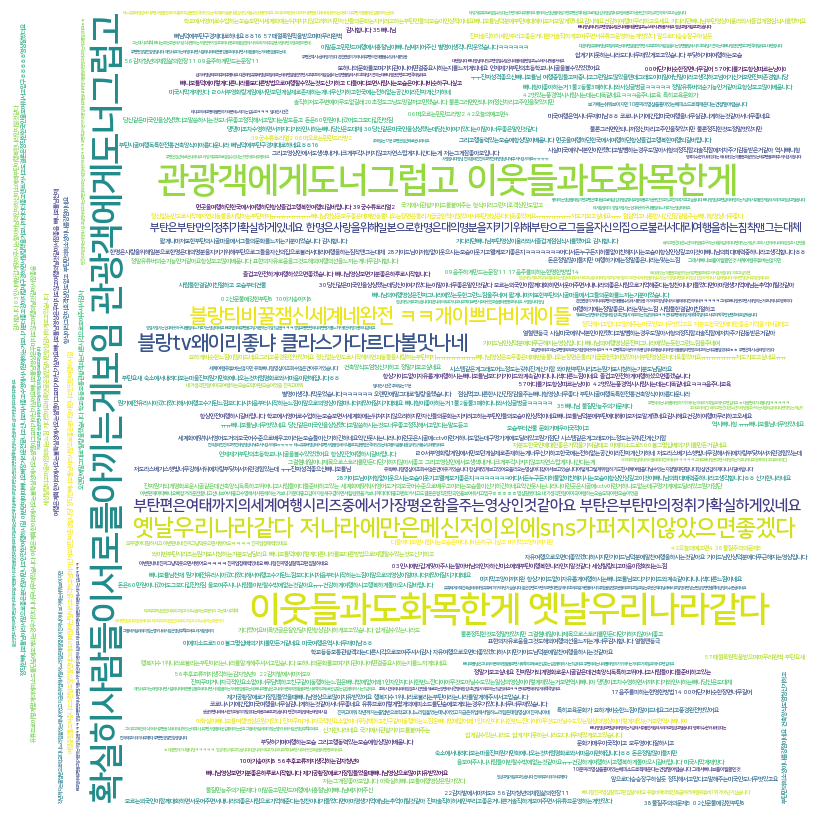

In [33]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,width=800, height=800,
                      background_color='white',stopwords=stopwords, min_word_length=4).generate(text)
# 단어의 빈도 계산
wordcloud.generate_from_frequencies(wordcloud.process_text(text.lower()))
word_freq = wordcloud.process_text(text.lower())
# 워드 클라우드 출력
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
# 파일로 저장
plt.savefig('wordcloud.png',dpi=300)


In [81]:
word_num = {}
for word, freq in word_freq.items():
    if freq < 3:
        word_num[word] = freq
        
for word,frequency in word_num.items():
    print(f'{word} {frequency}')

빠니보틀영상오랫만에올라와너무반갑긴하지만 1
사실재미는별로없다 1
바다와거기의충만한것은외치며들판과그안에있는모든것은기뻐할지로다 1
그때에숲속의나무들이 1
앞에서노래하리니이는그분께서땅을심판하러오시기때문이로다 1
역대상16 1
회개하세요 1
심판주되신예수님곧오십니다 1
세뇌와통제의나라 1
자유와행복이모르는듯 1
작은남자빠니 1
살찐이정 1
난진짜궁금한게한글이있어서좋은점이뭔지를모르겠다한국어갖고어느나라가서소통할수있음 1
영어썼으면아니최소일본어 1
중국어라도썼으면중 1
일공부고 1
여행이고편리한거아냐 1
38pani'spanty 1
빤스ㅎㅎ 1
느낌이통제가심한게공산국가느낌이나는데맞나요 1
얼굴부은건가요살찐건가요 1
불자로서한마디하자면성행위로깨달음을추구하는것은불교밀교의한가지수행법으로써누구나하는보편적인방법이아닌수행의단계가높은고승만이할수있다 1
향락을위한것이아니라반대로향락의무상함을관하는것이며성에너지를이용하는방편이다 1
모든불교수행법은욕망을버리는것이며욕망을추구하지않는다 1
한국고양이들은도망치기바쁜데부탄고양이들은숫기가잇네얼마나한국인들이괴롭혀댓으면ㅉ 1
17젊은사람이아줌마한테큰짐을옮기라고시킨다고 1
그렇게안봤는데ㅡㅡ 1
빠니보틀재미없어졌엉 1
저는소련이싫어요 1
중국이싫어요 1
북한이싫어요 1
그냥공산당이싫어요 1
그리고여자에환장한안경물소도싫어요 1
세계는우크라이나의평화를원합니다 1
빠니보틀영상중에제일재미업는듯 1
어디서추잡하게한국공장생산쥰크푸드가져다선물하세요ㅋㅋㅋㅋ시골사람의몸과시골생태계를오염시킵니다 1
뭘우연찮게연락이돼 1
1편보고연락해왔겠지 1
식상한표현쓰지마세요빠니아재 1
18미국평행세계곽튜브등장 1
미국음식은맛없어보여요 1
한국이짱 1
코로나걸려도한국은오지말길 1
60만원사기당했노ㅋㅋ 1
tmiinusa 1
구멍이있으면넣어봐야지 1
07ㅗㅜㅑ 1
ㅇㅑ동볼바에ㅋㅋ블랑티비보는게돈안나가 1
수위도더좋아 1
이쁜애들도훨많아ㅎㅎㅎ도대체야동왜봄 1
빠니보틀말투희철리즘이랑비슷해진것같은데별루임 1
예전에빠니말투로얘기해주세여그게더죠아요ㅎ 1
미국여행하지마요 1
범죄저지르지마라 1
국제범죄저지

In [1]:
!pip install -U scikit-learn scipy

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import itertools

In [2]:
def train_sentiment_analysis_model(positive_file, negative_file):
# 긍정 단어와 부정 단어를 읽어서 리스트로 변환합니다.
    with open(positive_file, 'r', encoding='utf-8') as f:
        positive_words = f.read().splitlines()
    with open(negative_file, 'r', encoding='utf-8') as f:
        negative_words = f.read().splitlines()
    # 긍정적인 문장과 부정적인 문장을 학습 데이터로 생성합니다.
    positive_sentences = [" ".join(positive_words)] * len(positive_words)
    negative_sentences = [" ".join(negative_words)] * len(negative_words)
    # 학습 데이터와 레이블을 생성합니다.
    X = positive_sentences + negative_sentences
    y = [1] * len(positive_sentences) + [0] * len(negative_sentences)
    # CountVectorizer를 사용하여 단어의 빈도수를 측정합니다.
    vectorizer = CountVectorizer(token_pattern=r"\b\w+\b") # 단어의 빈도를 측정하는데 사용
    X = vectorizer.fit_transform(X) # 행렬도 문자를 반환
    # LogisticRegression을 사용하여 모델을 학습합니다.
    clf = MultinomialNB() # 변환된 문자 행렬을 학습함(다른 Classification 알고리즘으로도 사용 가능)
    clf.fit(X, y)
    return vectorizer, clf


In [3]:
def predict_sentiment_analysis(text, vectorizer, clf):
    # 입력된 텍스트를 벡터화합니다.
    X = vectorizer.transform([text])
    # 모델을 사용하여 감성을 예측합니다.
    y_pred = clf.predict(X)
    # 예측 결과에 따라 출력 메시지와 카운트 정보를 선택합니다.
    if y_pred[0] == 1:
        result = {"sentiment": "긍정적인 단어", "positive_count": 1, "negative_count": 0}
    else:
        result = {"sentiment": "부정적인 단어", "positive_count": 0, "negative_count": 1}
    # 입력된 텍스트에 포함된 긍정 단어와 부정 단어를 카운트합니다.
    for word in text.split():
        if word in positive_words:
            result["positive_count"] += 1
        elif word in negative_words:
            result["negative_count"] += 1
    return result

In [4]:
with open('positive_words.txt', 'r',encoding='utf-8') as f:
    positive_words = f.read().splitlines()
with open('negative_words.txt', 'r',encoding='utf-8') as f:
    negative_words = f.read().splitlines()

vectorizer, clf=train_sentiment_analysis_model("positive_words.txt","negative_words.txt")
text = input("분석할 문자열을 입력하세요: ")
predict_sentiment_analysis(text, vectorizer, clf)


분석할 문자열을 입력하세요: gg


{'sentiment': '긍정적인 단어', 'positive_count': 2, 'negative_count': 0}

In [11]:
df = pd.read_csv("text_crwal_csv.csv", encoding='utf-8-sig') # csv파일을 데이터 프레임 형태로 불러오기
comment_col = '댓글 내용' 
comment_list = df[comment_col].tolist() # 데이터 프레임에서 comment_col에 지정한 변수를 모두 리스트로 바꾸는 함수
new_list = []
for x in comment_list:
    new_list.append(str(x))

In [14]:
emotion = []
for i in new_list:
    a = predict_sentiment_analysis(i, vectorizer, clf)
    emotion.append(a['sentiment'])
#     a['sentence'] = i
#     emotion.append(a)
df['감정'] = pd.DataFrame(emotion)
df

,아이디,댓글 내용,감정
0,사랑합니다,부탄편은여태까지의세계여행시리즈중에서가장평온함을주는영상인것같아요.부탄은부탄만의정취가확...,긍정적인 단어
1,하쿠나마타타,한명은사랑을위해일본으로한명은대의명분을지키기위해부탄으로그들을자신의집으로불러서대리여행을...,긍정적인 단어
2,민지,10:28가이드님이저항없이웃으시는모습이웃기고왤케보기좋은지ㅋㅋㅋㅋㅋㅋㅋ어디서든누구든지...,긍정적인 단어
3,Docchi,신기한나라네요...국가에서관광가이드를붙여주는?형식이라그런지호객상인도없고...부탄만의...,긍정적인 단어
4,꾸꾸,진짜뭔가되게평화로운시골같은데건축양식독특하고뛰어나고사람들이다들준비하고있는?세계화에맞춰...,긍정적인 단어
...,...,...,...
66313,김김,미국여행하지마요.범죄저지르지마라.국제범죄저지르지마라.,긍정적인 단어
66314,훈수충,곽씨한테조회수추월당했네,긍정적인 단어
66315,لكنسعقلها,돈도많음서엄살은,긍정적인 단어
66316,진,어리버리눈이안좋은가산만하구만차도.다닥다닥붙어있는것도아닌데눈도안좋으면서여행짓거리니대단...,긍정적인 단어


In [16]:
df.to_csv("text_crwal_csv_plus_emotion.csv", index=False, encoding="utf-8-sig")